## Final Project - BME 231 (Lee, Atsumi, Cashman, Paliwal)

EDA Style presentation of Heart Disease Classification

## General Guidelines

* Get the data and gain basic understanding
* Wrangle the data
* Profile the data
* Visualize the data
* Test on Different Algorithms
* Evaluatation

## 1. Data Profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

## Load Data
data = pd.read_csv("./utility/data/heart.csv")
print(f"examples: {data.shape[0]} features: {data.shape[1]}")
data.head()

examples: 303 features: 14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Getting the Unique Values

In [2]:
data.T
data.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

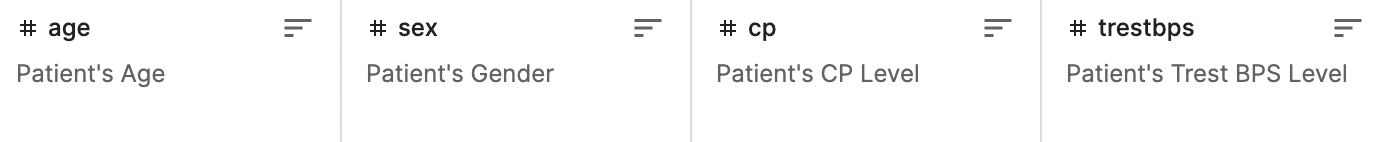

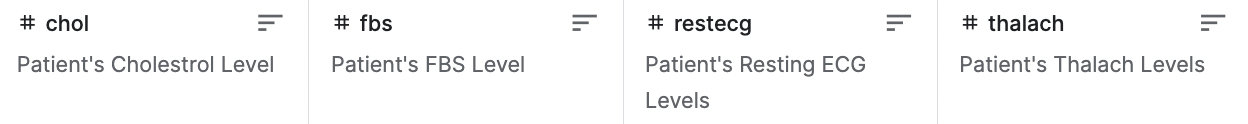

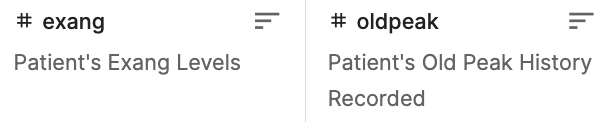

#### Missing: "Target" -> 1 indicates yes, 0 indicates no to heart disease

### Getting Data Type / Rid of N/A Values & Duplicates

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.dropna(axis=0, inplace=True)
print(f"\nShape of data after removing missing data: {data.shape}")


Shape of data after removing missing data: (303, 14)


In [5]:
data.drop_duplicates(inplace=True)
print(f"\nShape of data after removing duplicate data: {data.shape}")


Shape of data after removing duplicate data: (302, 14)


### Getting Correlation

In [6]:
int_data = data.select_dtypes(include=[np.number])
int_data.corr()['target'].sort_values(ascending=True)

exang      -0.435601
oldpeak    -0.429146
ca         -0.408992
thal       -0.343101
sex        -0.283609
age        -0.221476
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
slope       0.343940
thalach     0.419955
cp          0.432080
target      1.000000
Name: target, dtype: float64

From this information, we can see that "cp (Patient's cp level)" & "thalach (Patient's thalach levels)" form the highest correlation with the presence of heart disease"

## 2. Visualization

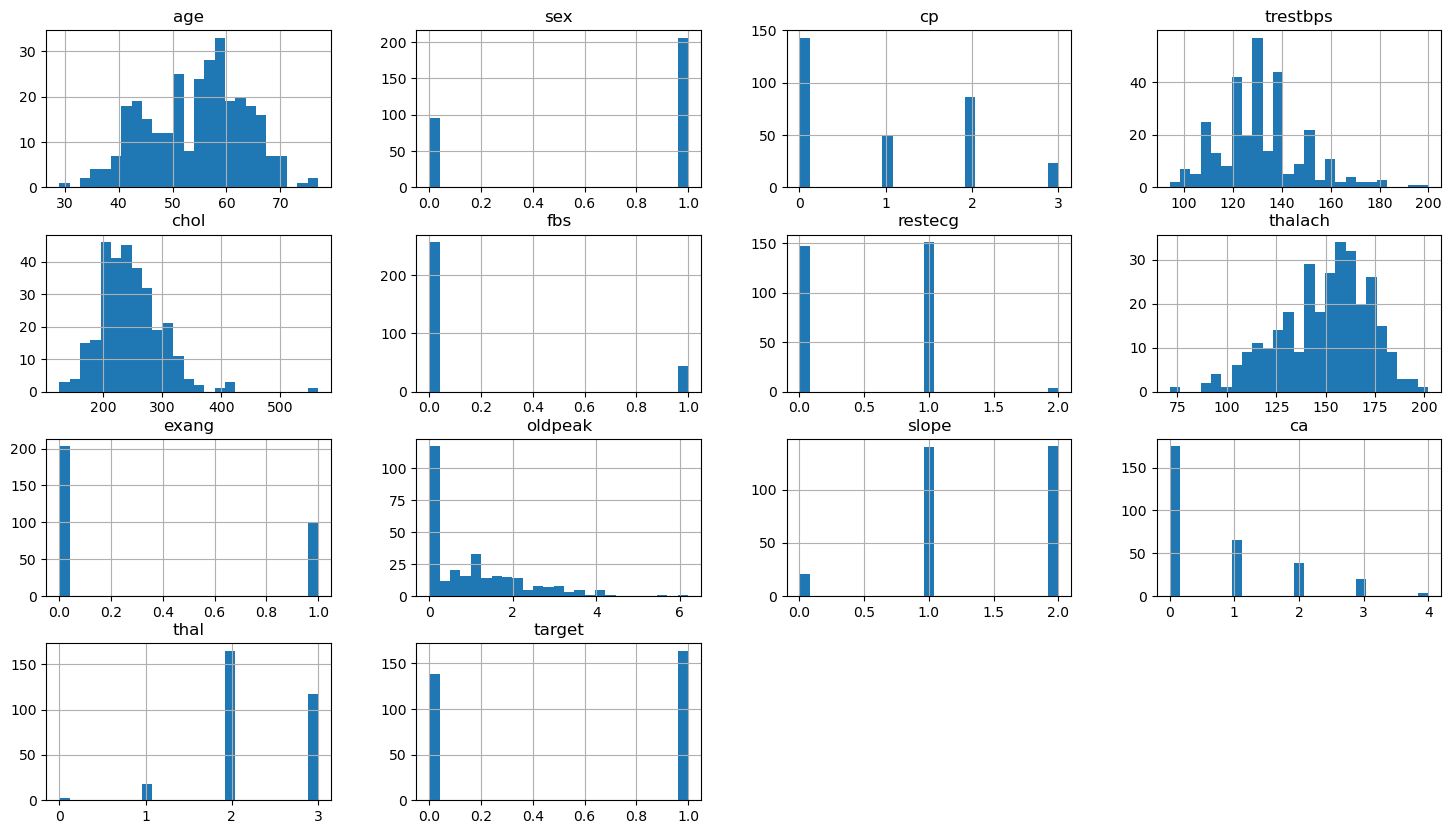

In [7]:
int_data.hist(figsize=(18, 10), bins=25);

Text(0, 0.5, 'Frequency')

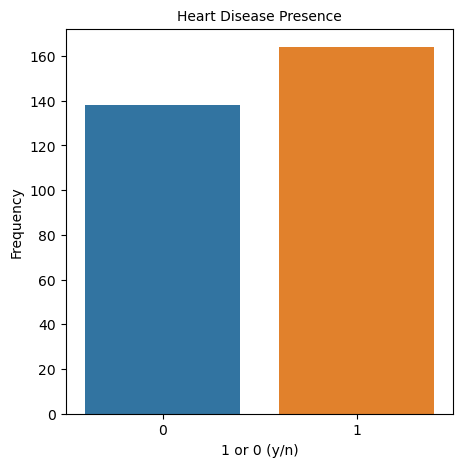

In [8]:
f, axes = plt.subplots(1, figsize=(5,5))
plt.xticks(rotation = 0, fontsize=10)
graph = sns.countplot(x=int_data['target'])

plt.title('Heart Disease Presence', fontsize=10)
plt.xlabel('1 or 0 (y/n)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

### Correlation Heatmap

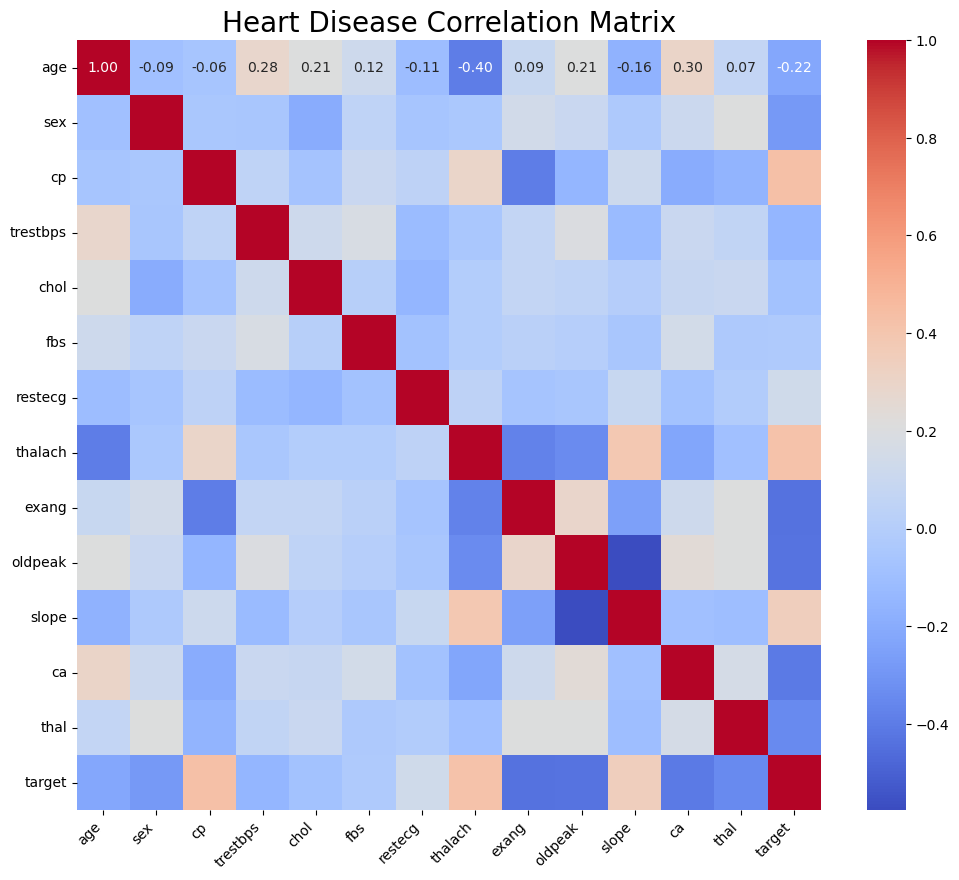

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(int_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Heart Disease Correlation Matrix', fontsize=20)
plt.show()

## 3. Splitting the Data

In [15]:
X = int_data.drop(['target'], axis=1).astype(int) 
y = int_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

classifier = KNeighborsClassifier(n_neighbors = 1) 
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

# get the correct value
correct = np.where(prediction == y_test, 1, 0).sum()
print("The correct value:", correct)

# test our accuracy
accuracy = correct/len(y_test)
print("Our accuracy:", accuracy)

The correct value: 33
Our accuracy: 0.5409836065573771


## 4. Validation Curve

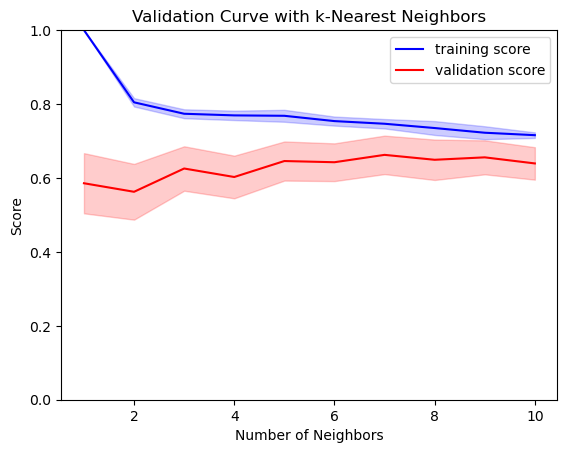

In [17]:
from sklearn.model_selection import validation_curve


# Define range of neighbors from 1 to 10
neighbors_range = np.arange(1, 11)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform validation curve
train_scores, test_scores = validation_curve(
    estimator=knn,
    X=X,  
    y=y,
    param_name='n_neighbors',
    param_range=neighbors_range,
    cv=7
)

# Plot validation curve
plt.plot(neighbors_range, np.mean(train_scores, axis=1), color='blue', label='training score')
plt.plot(neighbors_range, np.mean(test_scores, axis=1), color='red', label='validation score')
plt.fill_between(neighbors_range, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.2,
                 color="blue")
plt.fill_between(neighbors_range, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                 np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.2,
                 color="red")
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.title('Validation Curve with k-Nearest Neighbors')
plt.show()

## 5. Try Different Algorithms

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize classifiers
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_optimal = KNeighborsClassifier(n_neighbors=7) 
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Train and evaluate 1-neighbor KNeighborsClassifier
knn_1.fit(X_train, y_train)
y_pred_knn_1 = knn_1.predict(X_test)
accuracy_knn_1 = accuracy_score(y_test, y_pred_knn_1)

# Train and evaluate optimal-neighbor KNeighborsClassifier
knn_optimal.fit(X_train, y_train)
y_pred_knn_optimal = knn_optimal.predict(X_test)
accuracy_knn_optimal = accuracy_score(y_test, y_pred_knn_optimal)

# Train and evaluate Decision Tree Classifier
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

# Train and evaluate Random Forest Classifier
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

# Report accuracy findings
print("Accuracy Findings:")
print("1-neighbor KNeighborsClassifier: {:.2f}%".format(accuracy_knn_1 * 100))
print("Optimal-neighbor KNeighborsClassifier: {:.2f}%".format(accuracy_knn_optimal * 100))
print("Decision Tree Classifier: {:.2f}%".format(accuracy_decision_tree * 100))
print("Random Forest Classifier: {:.2f}%".format(accuracy_random_forest * 100))

Accuracy Findings:
1-neighbor KNeighborsClassifier: 54.10%
Optimal-neighbor KNeighborsClassifier: 65.57%
Decision Tree Classifier: 85.25%
Random Forest Classifier: 86.89%


### 6. Evaluation - Random Forest Classifier Evaluation

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_random_forest)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[29  0]
 [ 0 32]]


In [25]:
# Classification Report
class_report = classification_report(y_test, y_pred_random_forest)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



### Decision Tree Classifier Evaluation

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred_decision_tree)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[29  0]
 [ 0 32]]


In [27]:
# Classification Report
class_report = classification_report(y_test, y_pred_decision_tree)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



### Optimal Neighbor (KNN) Evaluation

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred_knn_optimal)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[18 11]
 [ 8 24]]


In [29]:
class_report = classification_report(y_test, y_pred_knn_optimal)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



### 1 Neighbor (KNN) Evaluation

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred_knn_1)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[16 13]
 [12 20]]


In [31]:
class_report = classification_report(y_test, y_pred_knn_1)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56        29
           1       0.61      0.62      0.62        32

    accuracy                           0.59        61
   macro avg       0.59      0.59      0.59        61
weighted avg       0.59      0.59      0.59        61

